## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mousestudy_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicatemice_df = mousestudy_df[mousestudy_df.duplicated(['Mouse ID','Timepoint'])]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousestudy_df[mousestudy_df['Mouse ID'] == 'g989' ].index
mousestudy_df= mousestudy_df.drop(mousestudy_df[mousestudy_df['Mouse ID'] == 'g989' ].index)
mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mousestudy_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean
Tumor_group_df = mousestudy_df.groupby('Drug Regimen')
mean = Tumor_group_df ["Tumor Volume (mm3)"].mean()
#median
median = Tumor_group_df ["Tumor Volume (mm3)"].median()
#sem
sem_df= Tumor_group_df ["Tumor Volume (mm3)"].sem()
#variance
variance = Tumor_group_df ["Tumor Volume (mm3)"].var()
#standard deviation
deviation = Tumor_group_df ["Tumor Volume (mm3)"].std()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
total_df = pd.DataFrame({"Mean": mean, "Median":median, "Variance": variance,"SEM":sem_df,"Deviation":deviation})
total_df                                               


,Mean,Median,Variance,SEM,Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.320930,50.446266,43.852013,0.544332,6.622085
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [8]:
sem = pd.DataFrame(Tumor_group_df["Tumor Volume (mm3)"].sem())
sem.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466


## Bar Plots

<class 'pandas.core.series.Series'>


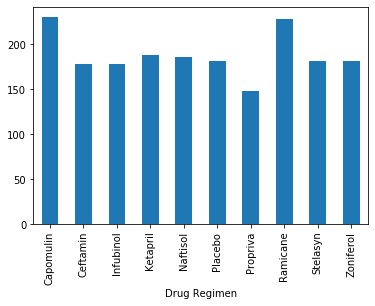

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

mice = mousestudy_df.groupby(["Drug Regimen"])["Mouse ID"].count()                                             

mice.plot.bar(rot=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

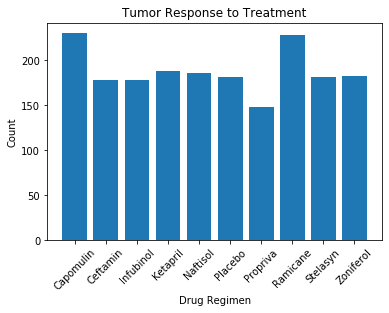

In [44]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot  

x = mice.index.tolist()
y = mice.values.tolist()
plt.bar(x,y)

plt.ylabel("Count")
plt.xlabel("Drug Regimen")
plt.title('Tumor Response to Treatment')
plt.xticks(rotation=45)


## Pie Plots

Text(0.5, 1.0, 'Male vs Female Population')

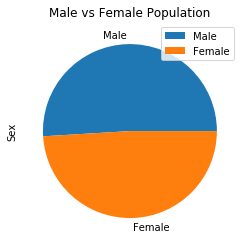

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = mousestudy_df["Sex"].value_counts().to_frame()
plot_pie = sex_df.plot(kind="pie", y="Sex", figsize=(4, 4))
plt.title("Male vs Female Population")


In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=list(mousestudy_df_count.index.values)
pie_values=[mousestudy_df_count["Sex"]
colors=["lightblue", "orange"]
plt.pie(pie_values, labels=gender,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140,
#plt.rcParams['font.size']==16)
plt.title=("Distribution of Female Versus Male Mice")      
plt.axis('equal')
plt.show()
print(gender)

labels = ["Male", "Female"]
sizes = [15, 30]

#axl = plt.subplots()
#ax1.pie(gender,  labels=pie_values, autopct='%1.1f%%', shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

SyntaxError: invalid syntax (<ipython-input-49-78ce2977f2bb>, line 4)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
plt.title('Reaction Times at Baseball Batting Cage')
plt.ylabel('Reaction Time (ms)')
plt.boxplot(times)
plt.show()

## Line and Scatter Plots

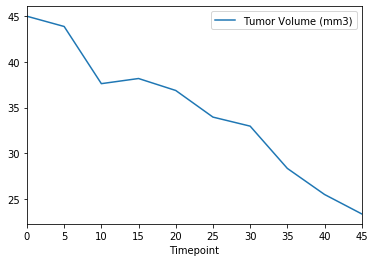

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capsamples= mousestudy_df[mousestudy_df["Drug Regimen"] == "Capomulin"]
capsample= mousestudy_df[mousestudy_df["Mouse ID"]== "s185"]
x_values=mousestudy_df["Timepoint"]
y_values=mousestudy_df["Tumor Volume (mm3)"]
capsample.plot(x="Timepoint", y="Tumor Volume (mm3)")


   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  


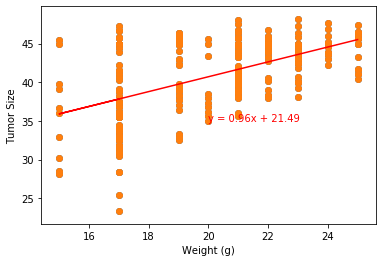

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
print(capsamples.head())
x_values=capsamples["Weight (g)"]
y_values=capsamples["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)

# Calculate the correlation coefficient and linear regression modelfor mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=10,color="red")


plt.xlabel("Weight (g)")
plt.ylabel("Tumor Size")
plt.show()


## Correlation and Regression

In [ ]:
#see above